# business understanding
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [73]:
data=pd.read_csv('E:\\marketing_campaign.csv', encoding='latin1',sep = ";")
data.head()

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# data understanding

In [74]:
data.shape

(2240, 29)

In [97]:
data.describe()

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,age,Day,Month,Year,total_children,total_purchase_amt
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,2.393953,3.726083,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,...,0.009477,3.0,11.0,0.150271,54.179603,15.653430,6.465253,2013.028430,0.947202,607.075361
std,3249.376275,11.985554,1.124141,1.077731,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,...,0.096907,0.0,0.0,0.357417,11.985554,8.785475,3.489767,0.685618,0.749062,602.900476
min,0.000000,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,27.000000,1.000000,1.000000,2012.000000,0.000000,5.000000
25%,2814.750000,1959.000000,2.000000,3.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,...,0.000000,3.0,11.0,0.000000,46.000000,8.000000,3.000000,2013.000000,0.000000,69.000000
50%,5458.500000,1970.000000,2.000000,4.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,...,0.000000,3.0,11.0,0.000000,53.000000,16.000000,6.000000,2013.000000,1.000000,396.500000
75%,8421.750000,1977.000000,3.000000,5.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,...,0.000000,3.0,11.0,0.000000,64.000000,23.000000,10.000000,2013.000000,1.000000,1048.000000
max,11191.000000,1996.000000,4.000000,7.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,1.000000,3.0,11.0,1.000000,130.000000,31.000000,12.000000,2014.000000,3.000000,2525.000000


In [75]:
data.dtypes

ï»¿ID                    int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [76]:
data.isnull().sum()

ï»¿ID                   0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [77]:
data.dropna(axis = 0, inplace = True)
data.shape

(2216, 29)

In [78]:
data.isnull().sum()

ï»¿ID                  0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# data preparation

In [79]:
data['Income'].bfill(inplace=True)

In [80]:
data['age']=np.subtract(2023,data['Year_Birth'])

In [81]:
data['visits']=data['Recency'].apply(lambda x : 'Regular' if (x >= 0 and x <= 31) else 'Not Regular')

In [82]:
data['income_level']=data['Income'].apply(
    lambda x : 'Low' if (x <= 50000) 
    else 'Medium' if (x > 50000 and x <= 150000) 
    else 'High'
    )

In [83]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

data['Day'] = data['Dt_Customer'].apply(lambda x: x.day)
data['Month'] = data['Dt_Customer'].apply(lambda x: x.month)
data['Year'] = data['Dt_Customer'].apply(lambda x: x.year)

data.drop(columns='Dt_Customer', inplace=True)

In [84]:
data['total_children']=np.add(data['Kidhome'],data['Teenhome'])

In [85]:
data['total_purchase_amt']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [86]:
data.iloc[:5]

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Z_Revenue,Response,age,visits,income_level,Day,Month,Year,total_children,total_purchase_amt
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,11,1,66,Not Regular,Medium,4,9,2012,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,11,0,69,Not Regular,Low,8,3,2014,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,11,0,58,Regular,Medium,21,8,2013,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,11,0,39,Regular,Low,10,2,2014,1,53
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,11,0,42,Not Regular,Medium,19,1,2014,1,422


# Modeling

In [87]:
X=data[['Income','total_purchase_amt']]

In [88]:
from sklearn.cluster import KMeans
wcss=[]
for index in range(1,11):
    kmeans=KMeans(n_clusters=index,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\a

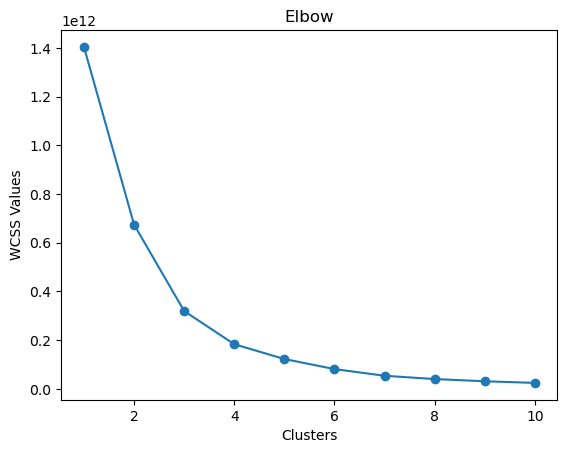

In [89]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow')
plt.xlabel('Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [90]:
#fit model
kmeans=KMeans(n_clusters=3,init='k-means++')
y_pred=kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.45450520e+04 1.63284581e+02]
 [7.02820454e+04 1.07397130e+03]
 [6.66666000e+05 6.20000000e+01]]


In [91]:
kmeans.fit(X)

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

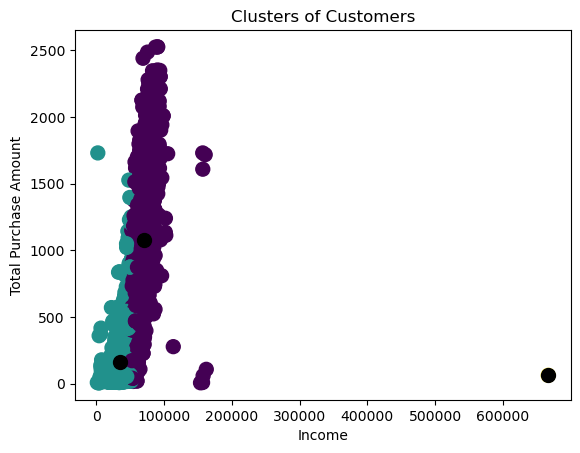

In [92]:
plt.scatter(X['Income'],X['total_purchase_amt'],s=100,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color='black')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Total Purchase Amount')
plt.show()

# evaluation

In [107]:
data=pd.read_csv('E:\\marketing_campaign.csv', encoding='latin1',sep = ";")
data=data.dropna()

label_en = LabelEncoder()
categorical_cols = ['Education', 'Marital_Status']
data[categorical_cols] = data[categorical_cols].apply(label_en.fit_transform)

X = data.drop(columns=['Response', 'Dt_Customer', 'ï»¿ID'])
y = data['Response']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.metrics import accuracy_score, classification_report
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

predictions = logistic.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.8693693693693694
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       382
           1       0.60      0.19      0.29        62

    accuracy                           0.87       444
   macro avg       0.74      0.59      0.61       444
weighted avg       0.84      0.87      0.84       444



C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.13063063063063063
Mean Squared Error: 0.13063063063063063
R-squared: -0.08731633170072639


In [113]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logistic, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Mean Accuracy:", cv_scores.mean())

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Cross-Validation Mean Accuracy: 0.8560480344904725


C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-